In [8]:
from sixdb import * 
import matplotlib.pyplot as plt
from sixdeskdb.davsturns import select_ang_surv, RunDaVsTurnsAng, get_divisors, mk_dir, mk_da_vst, get_min_turn_ang
import numpy as np
import pandas as pd

In [41]:
db1 = SixDeskDB('/home/phermes/development/SixDeskDB/test5_step_2.0sigma.db')
db2 = SixDeskDB('/home/phermes/development/SixDeskDB/test5_step_0.5sigma.db')

Opened test5_step_2.0sigma.db successfully
Opened test5_step_0.5sigma.db successfully


In [21]:
def plot_turn_selection(it,indx):
    ss,tt = s[indx], t[indx]
    lowest_index = np.where((tt<it) & (ss>0))[0][0] - 1 
    plt.plot([ss[lowest_index]],[tt[lowest_index]],'o')    
    plt.plot(ss, tt,'g.-')
    plt.xlim(9,12)
    plt.axhline(it,0,1)
    plt.ylim(0,100000)
    plt.show()
    print(ss[lowest_index],tt[lowest_index])

## Compare amplitude vs turns with different step sizes 

In [51]:
surv = db1.get_surv(1)
s1,t1,a1 = surv['sigma'], surv['sturn'], surv['angle']

surv = db2.get_surv(1)
s2,t2,a2 = surv['sigma'], surv['sturn'], surv['angle']

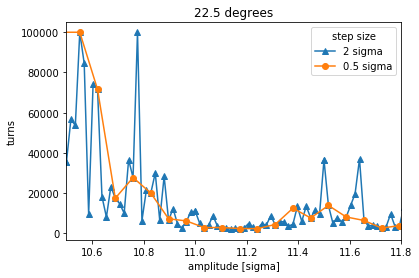

In [52]:
i=2

ss, tt, aa = s2[i], t2[i], a2[i]
plt.plot(ss,tt,'^-',label='2 sigma')

ss, tt, aa = s1[i], t1[i], a1[i]
plt.plot(ss,tt,'o-',label='0.5 sigma')




plt.xlim(10.5,11.8)
plt.title("{} degrees".format(aa[0]))
plt.legend(title='step size')
plt.xlabel("amplitude [sigma]")
plt.ylabel("turns")
plt.show()

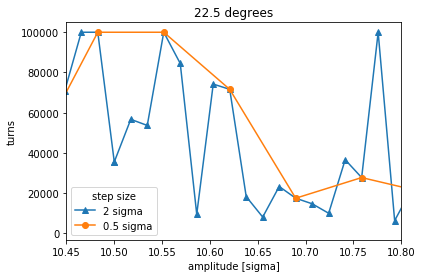

In [60]:
i=2

ss, tt, aa = s2[i], t2[i], a2[i]
plt.plot(ss,tt,'^-',label='2 sigma')

ss, tt, aa = s1[i], t1[i], a1[i]
plt.plot(ss,tt,'o-',label='0.5 sigma')


plt.xlim(10.45,10.8)
plt.title("{} degrees".format(aa[0]))
plt.legend(title='step size')
plt.xlabel("amplitude [sigma]")
plt.ylabel("turns")
plt.show()

# Step 1: Get surviving particles
Here only for seed 1 

## With 2 sigma amplitude spacing

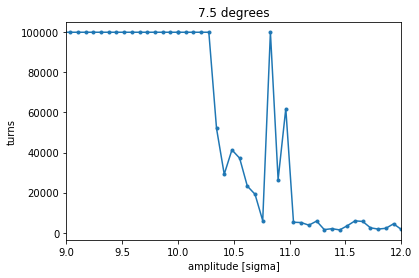

In [67]:
for i in range(1):
    ss, tt, aa = s1[i], t1[i], a1[i]
    plt.title("{} degrees".format(aa[0]))
    plt.plot(ss,tt,'.-')
    plt.xlim(9,12)
    plt.xlabel("amplitude [sigma]")
    plt.ylabel("turns")
    plt.show()

## With 0.5 sigma amplitude spacing

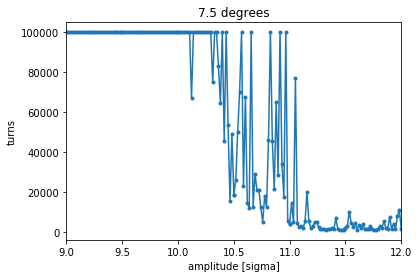

In [66]:
for i in range(1):
    ss, tt, aa = s2[i], t2[i], a2[i]
    plt.title("{} degrees".format(aa[0]))
    plt.plot(ss,tt,'.-')
    plt.xlim(9,12)
    plt.xlabel("amplitude [sigma]")
    plt.ylabel("turns")
    plt.show()

# Step 2: Get the max amplitude and tlossmin for each nturn

In [46]:
def get_min_turn_ang_single_angle(s,t,a,it,angle_idx):
    s,t,a = s[angle_idx], t[angle_idx], a[angle_idx]
    if len(t[(t<it) & (s>0)])>0:                                  # select only events for which s>0
        lowest_index = np.where((t<it) & (s>0))[0][0] - 1 
        ss,tt = s[lowest_index],t[lowest_index]
    else:
        ss,tt = 12.0, 100000
    return ss,tt

def get_min_turn_ang_new(s,t,a,it):
    output = []
    for indx in range(len(a)):                                         # loop over angles
        ss,tt = get_min_turn_ang_single_angle(s,t,a,it,indx)
        output.append([a[indx][0],ss,tt])
    output = pd.DataFrame(output,columns=['angle','sigma','turn'])
    return output

def plot_da_vst_given_seed(s,t,a,thresh,nangles=3):
    newpred = get_min_turn_ang_new(s,t,a,thresh)
    
    indx = 0
    for indx in range(nangles):
        ss, tt = s[indx], t[indx]
        plt.plot(ss, tt,'k.-')
        plt.xlim(9,12)
        plt.axhline(thresh,0,1,ls='dashed')

        plt.title("Angle: {0} deg".format(a[indx][0]))

        plt.scatter([newpred.iloc[indx]['sigma']], [newpred.iloc[indx]['turn']],s=100,label='New algorithm')

        plt.show()

In [47]:
newpred = get_min_turn_ang_new(s,t,a,9100)
print(newpred['turn'].min())
newpred

14493.0


,angle,sigma,turn
0,7.5,9.862072,19403.0
1,15.0,9.758615,39899.0
2,22.5,10.068962,17050.0
3,30.0,10.448273,16423.0
4,37.5,10.896553,63624.0
5,45.0,10.862068,48722.0
6,52.5,10.655154,49983.0
7,60.0,11.034478,15410.0
8,67.5,10.827588,14493.0
9,75.0,12.000000,100000.0


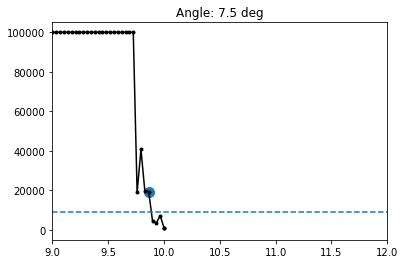

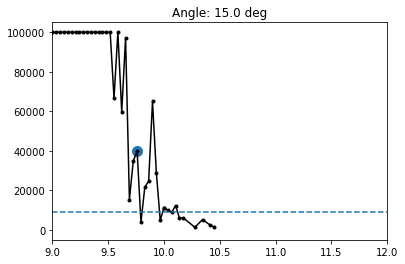

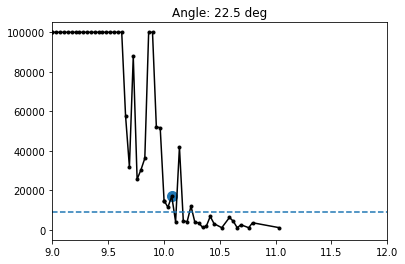

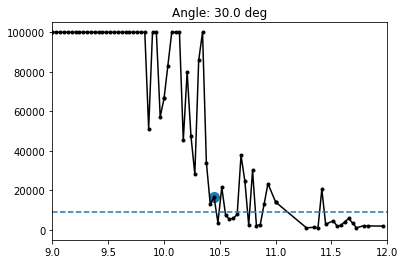

In [48]:
plot_da_vst_given_seed(s,t,a,9100,nangles=4)

# Step 3: Check why there can be multiple data points for a given tlossmin

In [53]:
df = db.get_da_vst(1,db.get_tunes()[0])
df = pd.DataFrame(df)

ddd = df[['dawtrap','nturn','tlossmin']]
# ddd = ddd.sort_values('dawtrap', ascending=False).drop_duplicates('tlossmin').sort_index()

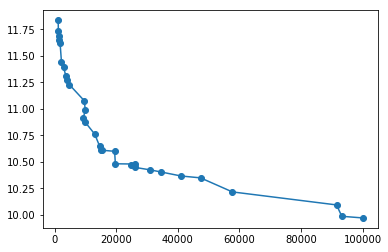

In [107]:
plt.plot(ddd['tlossmin'], ddd['dawtrap'],'o-')
plt.show()

There are some areas in which the subsequent tlossmin is smaller than the previous one!

In [58]:
np.diff(ddd['tlossmin'])

array([    66.,    175.,     51.,    323.,    460.,    685.,    752.,
          374.,    746.,   4829.,    382.,   -753.,    753.,   3036.,
         1568.,    387.,    530.,   3993.,    233.,   6466.,  -1392.,
         1392.,   4792.,   3498.,   6592.,   6356.,  10343.,  33858.,
         1722.,   6737.])

In [66]:
ddd.iloc[18:25]

,dawtrap,nturn,tlossmin
18,10.600041,15400.0,19403.0
19,10.482334,18900.0,19636.0
20,10.479881,19600.0,26102.0
21,10.470914,20500.0,24710.0
22,10.447930,24700.0,26102.0
23,10.425157,26100.0,30894.0
24,10.405533,30800.0,34392.0


Why is tlossmin going down from 20 to 21 and back to the previous level again for 22

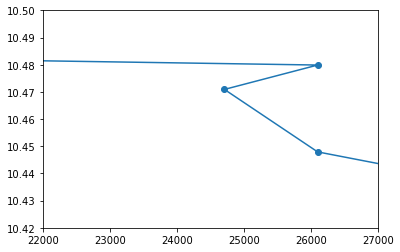

In [73]:
plt.plot(ddd['tlossmin'], ddd['dawtrap'],'o-')
plt.xlim(22000,27000)
plt.ylim(10.42,10.5)
plt.show()

In [83]:
newpred = get_min_turn_ang_new(s,t,a,19700)
ii = newpred['turn'].idxmin()
print(newpred['turn'][ii], newpred['angle'][ii],ii)

(26102.0, 52.5, 6)


In [84]:
newpred = get_min_turn_ang_new(s,t,a,20600)
ii = newpred['turn'].idxmin()
print(newpred['turn'][ii], newpred['angle'][ii],ii)

(24710.0, 60.0, 7)


In [85]:
newpred = get_min_turn_ang_new(s,t,a,24800)
ii = newpred['turn'].idxmin()
print(newpred['turn'][ii], newpred['angle'][ii],ii)

(26102.0, 52.5, 6)


Hence, the angle for which the min turn number is found changes here.

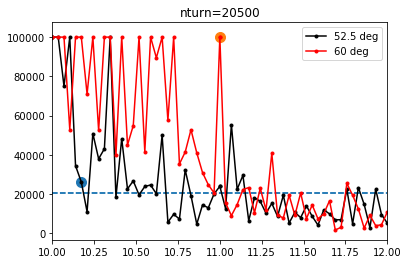

In [109]:
thresh = 20500
plt.axhline(thresh,0,1,ls='dashed')
plt.axhline(thresh-100,0,1,ls='dashed')

indx = 6
ss, tt = s[indx], t[indx]
plt.plot(ss, tt,'k.-',label='52.5 deg')
newpred = get_min_turn_ang_new(s,t,a,thresh)
plt.scatter([newpred.iloc[indx]['sigma']], [newpred.iloc[indx]['turn']],s=100)

indx = 7
ss, tt = s[indx], t[indx]
plt.plot(ss, tt,'r.-',label='60 deg')
newpred = get_min_turn_ang_new(s,t,a,thresh)
plt.scatter([newpred.iloc[indx]['sigma']], [newpred.iloc[indx]['turn']],s=100)
plt.xlim(10,12)
plt.title('nturn={}'.format(thresh))
plt.legend()
# plt.ylim(18000,28000)

plt.show()

24710.0


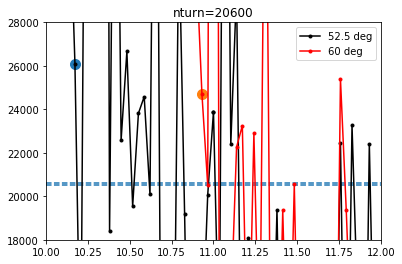

In [110]:
thresh = 20600
plt.axhline(thresh,0,1,ls='dashed')
plt.axhline(thresh-100,0,1,ls='dashed')

indx = 6
ss, tt = s[indx], t[indx]
plt.plot(ss, tt,'k.-',label='52.5 deg')
newpred = get_min_turn_ang_new(s,t,a,thresh)
plt.scatter([newpred.iloc[indx]['sigma']], [newpred.iloc[indx]['turn']],s=100)

indx = 7
ss, tt = s[indx], t[indx]
plt.plot(ss, tt,'r.-',label='60 deg')
newpred = get_min_turn_ang_new(s,t,a,thresh)
plt.scatter([newpred.iloc[indx]['sigma']], [newpred.iloc[indx]['turn']],s=100)
plt.xlim(10,12)
print(newpred.iloc[indx]['turn'])

plt.legend()
plt.ylim(18000,28000)
plt.title('nturn={}'.format(thresh))

plt.show()

This means that with nturn=24800, tlossmin should be back at the same level as with nturn=20500. This is also what is observed.

# Step 4 : Check Monotonicity
Is the minimum DA for each tlossmin1>tlossmin0 smaller?

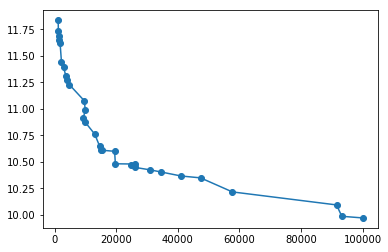

In [112]:
plt.plot(ddd['tlossmin'], ddd['dawtrap'],'o-')
plt.show()

In [147]:
df = db.get_da_vst(1,db.get_tunes()[0])
df = pd.DataFrame(df)
ddd = df[['dawtrap','nturn','tlossmin']]

# drop duplicates and keep the smaller da value
# ddd = ddd.sort_values('dawtrap', ascending=False).drop_duplicates('tlossmin').sort_index()

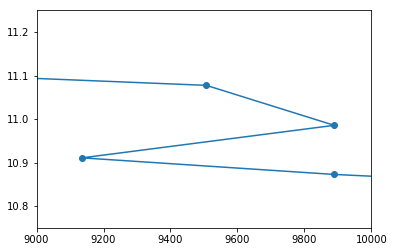

In [148]:
plt.plot(ddd['tlossmin'], ddd['dawtrap'],'o-')
plt.xlim(9000,10000)
plt.ylim(10.75,11.25)
plt.show()

In [150]:
ddd[(ddd['tlossmin']>9000) & (ddd['tlossmin']<15000)]

,dawtrap,nturn,tlossmin
10,11.077553,4600.0,9507.0
11,10.985635,5400.0,9889.0
12,10.910852,7700.0,9136.0
13,10.872697,8900.0,9889.0
14,10.761798,9800.0,12925.0
15,10.651045,12900.0,14493.0
16,10.612275,14400.0,14880.0


In [155]:
for thresh in [4700,7800]:
    newpred = get_min_turn_ang_new(s,t,a,thresh)
    ii = newpred['turn'].idxmin()
    print(thresh, newpred['turn'][ii], newpred['angle'][ii],ii)

(4700, 9507.0, 45.0, 5)
(7800, 9136.0, 60.0, 7)


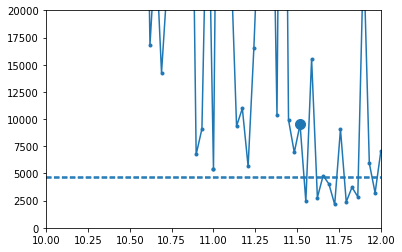

In [165]:
thresh = 4700
plt.axhline(thresh,0,1,ls='dashed')
plt.axhline(thresh-100,0,1,ls='dashed')

indx = 5
ss, tt = s[indx], t[indx]
plt.plot(ss, tt,'.-',label='52.5 deg')
newpred = get_min_turn_ang_new(s,t,a,thresh)
plt.scatter([newpred.iloc[indx]['sigma']], [newpred.iloc[indx]['turn']],s=100)

# plt.xlim(11.25,11.6)
plt.xlim(10,12)
plt.ylim(0,20000)
plt.show()

9136.0


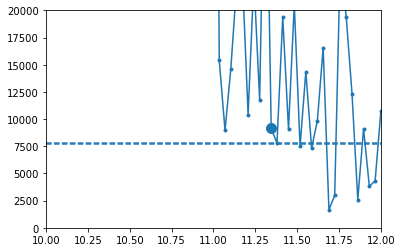

In [166]:
thresh = 7800
plt.axhline(thresh,0,1,ls='dashed')
plt.axhline(thresh-100,0,1,ls='dashed')

indx = 7
ss, tt = s[indx], t[indx]
plt.plot(ss, tt,'.-',label='52.5 deg')
newpred = get_min_turn_ang_new(s,t,a,thresh)
plt.scatter([newpred.iloc[indx]['sigma']], [newpred.iloc[indx]['turn']],s=100)
print(newpred.iloc[indx]['turn'])


# plt.xlim(11.25,11.6)
plt.xlim(10,12)
plt.ylim(0,20000)
plt.show()

9136.0


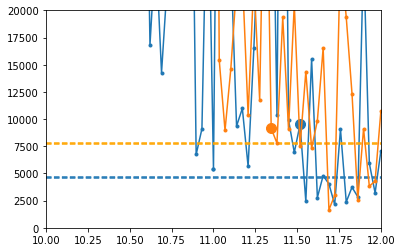

In [169]:
thresh = 4700
plt.axhline(thresh,0,1,ls='dashed')
plt.axhline(thresh-100,0,1,ls='dashed')

indx = 5
ss, tt = s[indx], t[indx]
plt.plot(ss, tt,'.-',label='52.5 deg')
newpred = get_min_turn_ang_new(s,t,a,thresh)
plt.scatter([newpred.iloc[indx]['sigma']], [newpred.iloc[indx]['turn']],s=100)


thresh = 7800
plt.axhline(thresh,0,1,ls='dashed',color='orange')
plt.axhline(thresh-100,0,1,ls='dashed',color='orange')

indx = 7
ss, tt = s[indx], t[indx]
plt.plot(ss, tt,'.-',label='52.5 deg')
newpred = get_min_turn_ang_new(s,t,a,thresh)
plt.scatter([newpred.iloc[indx]['sigma']], [newpred.iloc[indx]['turn']],s=100)
print(newpred.iloc[indx]['turn'])

# plt.xlim(11.25,11.6)
plt.xlim(10,12)
plt.ylim(0,20000)
plt.show()

In [734]:
output = []
currenttlossmin = 0

for it in range(0,100000,100):
    newpred = get_min_turn_ang_new(s,t,a,it)
# newpred
    tlossmin = newpred['turn'].min()
    if tlossmin!=currenttlossmin and tlossmin<1e5:
        output.append([it,tlossmin])
        currenttlossmin = tlossmin

In [735]:
output

[[1100, 7215.0],
 [1200, 3144.0],
 [1400, 3237.0],
 [1600, 3558.0],
 [1700, 2121.0],
 [2200, 3558.0],
 [3600, 3932.0],
 [4000, 4678.0],
 [4700, 9507.0],
 [5500, 14493.0],
 [7400, 14373.0],
 [7500, 14493.0],
 [7800, 9136.0],
 [9000, 14493.0],
 [9800, 12925.0],
 [13000, 14493.0],
 [14500, 14880.0],
 [14900, 15410.0],
 [15500, 19403.0],
 [19000, 19636.0],
 [19700, 26102.0],
 [20600, 24710.0],
 [24800, 26102.0],
 [26200, 30894.0],
 [30900, 34392.0],
 [34400, 40984.0],
 [35400, 47340.0],
 [45500, 57683.0],
 [57700, 91541.0],
 [82600, 93263.0]]

In [ ]:
# plt.plot([10.8],[9889],'o')
plot_turn_selection(5500,8)

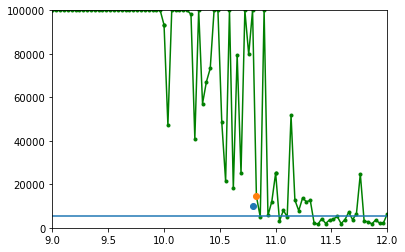

(10.827588432200619, 14493.0)


In [717]:
plt.plot([10.8],[9889],'o')
plot_turn_selection(5500,8)

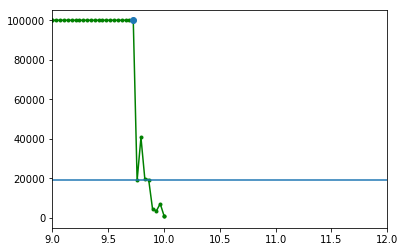

(9.7241401323710335, 100000.0)


In [675]:
plot_turn_selection(19000)

In [593]:
mta_angle   = newpred['angle']*np.pi/180.
l_mta_angle = len(mta_angle)
mta_simga   = newpred['sigma']

In [594]:
mta_sigma

array([  9.72414013,   9.65516592,   9.65516731,  10.13792647,
        10.34482704,   9.82758642,  10.10343419,   9.89655325,
         9.99999596,  10.13792577,  12.00004677])

In [621]:
dawtrapint = ((ajtrap*(mta_sigma**4*np.sin(2*mta_angle))).sum())*angstep
dawtrap    = (dawtrapint)**(1/4.)
dawtrap

10.187133275819724

In [581]:
oldpred = pd.DataFrame(get_min_turn_ang(s,t,a,40000))

,angle,sigma,sturn
0,7.5,10.000004,1046.0
1,15.0,10.448263,1542.0
2,22.5,11.034482,1112.0
3,30.0,11.965488,1957.0
4,37.5,12.000003,1287.0
5,45.0,9.896552,100000.0
6,52.5,10.103434,100000.0
7,60.0,10.344826,100000.0
8,67.5,10.517241,48591.0
9,75.0,10.137926,100000.0


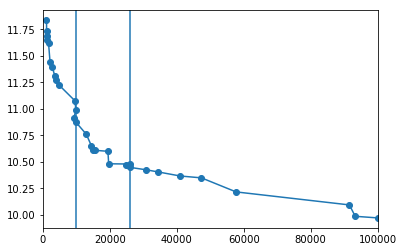

In [822]:
plt.plot(df['tlossmin'],df['dawtrap'],'-o')
# plt.plot(df['tlossmin'],df['dawsimp'],'.')
plt.axvline(9889,0,1)
plt.axvline(26102,0,1)

plt.xlim(0,100000)
plt.show()

In [848]:
df = db.get_da_vst(1,db.get_tunes()[0])
df = pd.DataFrame(df)

ddd = df[['dawtrap','nturn','tlossmin']]
ddd = ddd.sort_values('dawtrap', ascending=False).drop_duplicates('tlossmin').sort_index()

""


In [834]:
duplicates

,dawtrap,nturn,tlossmin
11,10.985635,5400.0,9889.0
13,10.872697,8900.0,9889.0
20,10.479881,19600.0,26102.0
22,10.447930,24700.0,26102.0


In [838]:
ddd = ddd.sort_values('dawtrap', ascending=False).drop_duplicates('tlossmin').sort_index()

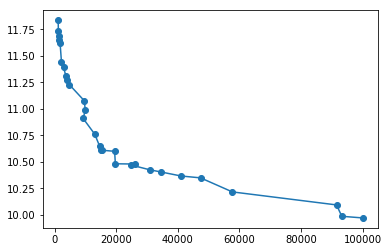

In [840]:
plt.plot(ddd['tlossmin'],ddd['dawtrap'],'-o')
plt.show()

In [843]:
np.diff(ddd['tlossmin']),np.diff(ddd['dawtrap'])

(array([    66.,    175.,     51.,    323.,    460.,    685.,    752.,
           374.,    746.,   4829.,    382.,   -753.,   3789.,   1568.,
           387.,    530.,   3993.,    233.,   6466.,  -1392.,   6184.,
          3498.,   6592.,   6356.,  10343.,  33858.,   1722.,   6737.]),
 array([-0.10250056, -0.04188518, -0.04541643, -0.02162941, -0.18366457,
        -0.04849775, -0.08352155, -0.03249779, -0.04728416, -0.15120433,
        -0.09191778, -0.07478291, -0.14905413, -0.11075334, -0.03876977,
        -0.00265777, -0.00957562, -0.1177073 , -0.00245271, -0.00896764,
        -0.04575656, -0.01962383, -0.0383648 , -0.01768952, -0.1323765 ,
        -0.12264884, -0.1071996 , -0.01536054]))

In [616]:
df['tlossmin'][np.diff(df['tlossmin'])<0]

/home/phermes/anaconda3/envs/py27/lib/python2.7/site-packages/pandas/core/internals.py:258: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 31 but corresponding boolean dimension is 30
  return self.values[slicer]
/home/phermes/anaconda3/envs/py27/lib/python2.7/site-packages/pandas/core/indexes/base.py:1650: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 31 but corresponding boolean dimension is 30
  result = getitem(key)


11     9889.0
20    26102.0
Name: tlossmin, dtype: float64

In [453]:

from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.floating_axes import GridHelperCurveLinear, FloatingSubplot
import mpl_toolkits.axisartist.grid_finder as gf

def generate_polar_axes():
    polar_trans = PolarAxes.PolarTransform()

    # Setup the axis, here we map angles in degrees to angles in radius
    phi_degree = np.arange(0, 90, 10)
    tlocs = phi_degree * np.pi / 180
    gl1 = gf.FixedLocator(tlocs)  # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, phi_degree))))

    # Standard deviation axis extent
    radius_min = 0
    radius_max = 13

    # Set up the axes range in the parameter "extremes"
    ghelper = GridHelperCurveLinear(polar_trans, extremes=(0, np.pi / 2,  # 1st quadrant
                                                           radius_min, radius_max),
                                    grid_locator1=gl1,
                                    tick_formatter1=tf1,
                                    )

    figure = plt.figure()

    floating_ax = FloatingSubplot(figure, 111, grid_helper=ghelper)
    figure.add_subplot(floating_ax)

    # Adjust axes
    floating_ax.axis["top"].set_axis_direction("bottom")  # "Angle axis"
    floating_ax.axis["top"].toggle(ticklabels=True, label=True)
    floating_ax.axis["top"].major_ticklabels.set_axis_direction("top")
    floating_ax.axis["top"].label.set_axis_direction("top")
    floating_ax.axis["top"].label.set_text("angle (deg)")

    floating_ax.axis["left"].set_axis_direction("bottom")  # "X axis"
    floating_ax.axis["left"].label.set_text(r"Horizontal Amplitude [$\sigma$]")

    floating_ax.axis["right"].set_axis_direction("top")  # "Y axis"
    floating_ax.axis["right"].label.set_text(r"Vertical Amplitude [$\sigma$]")    
    floating_ax.axis["right"].toggle(ticklabels=True)
    floating_ax.axis["right"].major_ticklabels.set_axis_direction("left")

    floating_ax.axis["bottom"].set_visible(False)  # Useless

    # Contours along standard deviations
    floating_ax.grid(True)
#     floating_ax.set_title("")

    data_ax = floating_ax.get_aux_axes(polar_trans)  # return the axes that can be plotted on

    return figure, data_ax

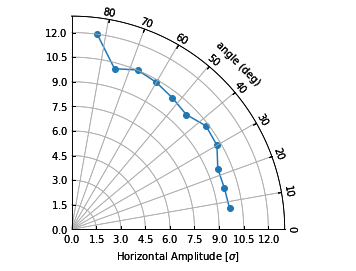

In [454]:
fig, ax = generate_polar_axes()

ax.plot(2*np.pi*output['angle']/360, output['sigma'],'o-')

plt.show()

In [456]:
angles, sigma = 2*np.pi*output['angle']/360, output['sigma']

In [457]:
angmax     = len(output['angle'] )#number of angles
angstep    = np.pi/(2*(angmax+1)) #step in angle in rad
ajtrap_s   = np.array([3/2.])     #trapezoidal rule
ajtrap_e   = np.array([3/2.])
ajtrap     = np.concatenate((ajtrap_s,np.ones(l_mta_angle-2),ajtrap_e))
dastrap    = (2./np.pi)*(ajtrap*sigma).sum()*angstep
dastrap

10.290227103258486

In [471]:
data = db.get_surv(1,db.get_tunes()[0])
s,a,t=data['sigma'],data['angle'],data['sturn']

In [495]:
mta = get_min_turn_ang(s,t,a,90000)

In [496]:
mta

array([(  7.5,  10.00000373,    1046.), ( 15. ,  10.44826283,    1542.),
       ( 22.5,  11.03448171,    1112.), ( 30. ,  11.96548834,    1957.),
       ( 37.5,  12.00000349,    1287.), ( 45. ,   9.55172475,  100000.),
       ( 52.5,   9.68964441,  100000.), ( 60. ,   9.62069284,  100000.),
       ( 67.5,   9.99999596,   93263.), ( 75. ,  10.13792577,  100000.),
       ( 82.5,  12.00004677,  100000.)], 
      dtype=[('angle', '<f8'), ('sigma', '<f8'), ('sturn', '<f8')])

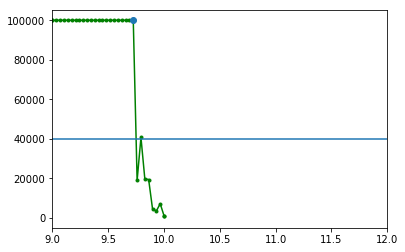

(9.7241401323710335, 100000.0)


In [512]:
indx = 0

ss,tt = s[indx], t[indx]
lowest_index = np.where((tt<40000) & (ss>0))[0][0] - 1 

plt.plot(ss, tt,'g.-')
plt.xlim(9,12)
plt.axhline(40000,0,1)
plt.plot([ss[lowest_index]],[tt[lowest_index]],'o')
# plt.xlim(0,30000)
plt.show()
print(ss[lowest_index],tt[lowest_index])

In [501]:
tang, sang = t[2], s[2]

In [502]:
tang, sang

(array([      0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,  100000.,  100000.,  100000.,  100000.,
         100000.,  100000.,  100000.,  100000.,  100000.,  100000.,
         100000.,  100000.,  100000.,  100000.,  100000.,  100000.,
         100000.,  100000.,  100000.,  100000.,  100000.,  100000.,
         100000.,  100000.,  100000.,  100000.,  100000.,  100000.,
         100000.,  100000.,  100000.,  100000.,  100000.,  100000.,
         100000.,  100000.,  100000.,  100000.,  100000.,  100000.,
         100000.,  100000.,  100000.,  100000.,  100000.,  100000.,
         100000.,  100000.,  100000.,  100000., 

In [505]:
iturn = tang<40000
lowest_index

309

In [508]:
sangit=sang[iturn].min() # s with lost turn number < it

In [509]:
argminit=sang.searchsorted(sangit)

In [516]:
argminit

0

In [514]:
(7.5,sang[argminit-1],tang[argminit-1])

(7.5, 11.034481712447345, 1112.0)

In [519]:
sang[-1]

11.034481712447345